<a href="https://colab.research.google.com/github/Sadat-Shakeeb/IPL-Data-Analysis-Using-Python-Libraries/blob/main/IPL_Data_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

## Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

In [ ]:
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [ ]:
# find all the final winners
mask = ipl['MatchNumber'] == 'Final'
new_df = ipl[mask]
new_df[['Season','WinningTeam']]

ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

,Season,WinningTeam
0,2022,Gujarat Titans
74,2021,Chennai Super Kings
134,2020/21,Mumbai Indians
194,2019,Mumbai Indians
254,2018,Chennai Super Kings
314,2017,Mumbai Indians
373,2016,Sunrisers Hyderabad
433,2015,Mumbai Indians
492,2014,Kolkata Knight Riders
552,2013,Mumbai Indians


In [ ]:
# how many super over finishes have occured
ipl[ipl['SuperOver'] == 'Y'].shape[0]

14

In [ ]:
# how many matches has csk won in kolkata
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

5

In [ ]:
# toss winner is match winner in percentage
(ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]/ipl.shape[0])*100

51.473684210526315

In [ ]:
# find which player has won most potm -> in finals and qualifiers
ipl = pd.read_csv('ipl-matches.csv')
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

,count
Player_of_Match,
KA Pollard,3
F du Plessis,3
SK Raina,3
A Kumble,2
MK Pandey,2
YK Pathan,2
M Vijay,2
JJ Bumrah,2
AB de Villiers,2


<Axes: ylabel='count'>

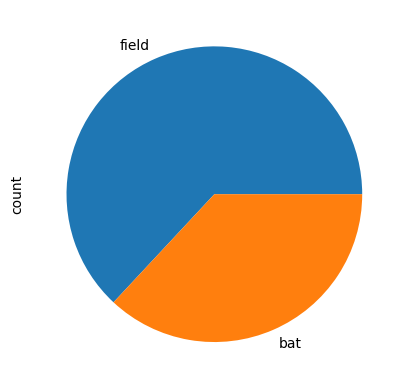

In [ ]:
# Toss decision plot
ipl['TossDecision'].value_counts().plot(kind='pie')

In [ ]:
# how many matches each team has played
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)

,count
Mumbai Indians,231
Royal Challengers Bangalore,226
Kolkata Knight Riders,223
Chennai Super Kings,208
Rajasthan Royals,192
Kings XI Punjab,190
Delhi Daredevils,161
Sunrisers Hyderabad,152
Deccan Chargers,75
Delhi Capitals,63


In [ ]:
# find the last match played by virat kohli in Delhi
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']

def did_kohli_play(players_list):
  return 'V Kohli' in players_list

ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)].drop_duplicates(subset=['City','did_kohli_play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [ ]:
data = pd.read_csv('/content/ipl-matches.csv')
data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


### `Q:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [ ]:

changed_name = {'Delhi Daredevils':'Delhi Capitals',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiants':'Rising Pune Supergiant'}
data.replace(changed_name.keys(), changed_name.values(),inplace=True )

### `Q:` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


<Axes: >

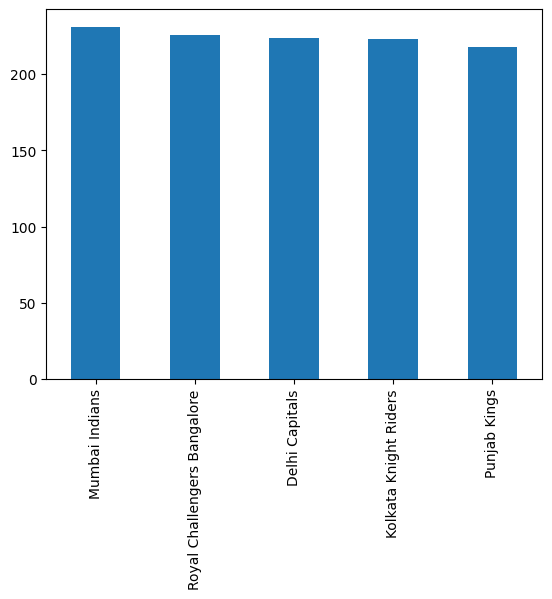

In [ ]:
(data['Team1'].value_counts()+data["Team2"].value_counts()).sort_values(ascending=False).head().plot(kind='bar')

### `Q:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [ ]:
m1 = (data.Team1 == "Mumbai Indians") | (data.Team2 == "Mumbai Indians")
m2 = data.WinningTeam != "Mumbai Indians"
data[m1 & m2].Player_of_Match.value_counts().head(1)

,count
Player_of_Match,
SPD Smith,4


### `Q:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [ ]:
def team1_vs_team2(t1, t2):
    m1 = (data.Team1 == t1) | (data.Team2 == t1)  # Filter for matches where only t1 played
    m2 = (data.Team1 == t2) | (data.Team2 == t2)  # Filter for matches where only t1 played
    df1 = data[m1 & m2]
    print(df1.WinningTeam.value_counts())
    print(df1.Player_of_Match.value_counts().head(1))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

WinningTeam
Chennai Super Kings      17
Kolkata Knight Riders     9
Name: count, dtype: int64
Player_of_Match
RA Jadeja    3
Name: count, dtype: int64


### `Q:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.





<Axes: xlabel='City'>

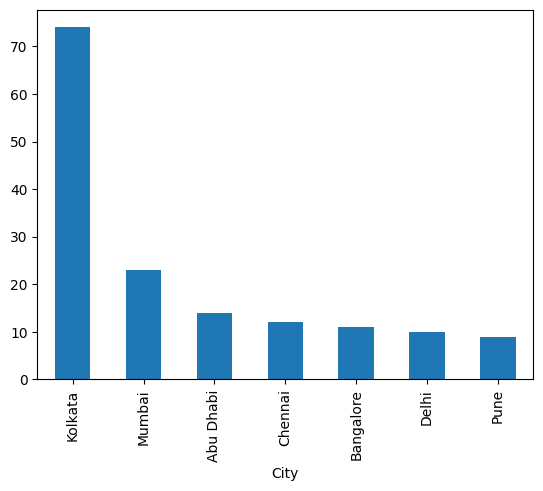

In [ ]:
data[(data.Team1 == "Kolkata Knight Riders") | (data.Team2 == "Kolkata Knight Riders")].City.value_counts().head(7).plot(kind='bar')

### `Q:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [ ]:
data[((data.Team1 == "Mumbai Indians") | (data.Team2 == "Mumbai Indians")) & (data.Season == "2011")].Margin.mean()

19.25

### `Q:` Make a dataframe of each team in IPL with details like - Team Name, Matches Played, Win%, Home Win%, Away Win%.
Show sorted dataframe on Win%

Note: Team1 represents Home team. Exclude not result matches.


In [ ]:
ipl_matches = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRy2DUdUbaKx_Co9F0FSnIlyS-8kp4aKv_I0-qzNeghiZHAI_hw94gKG22XTxNJHMFnFVKsO4xWOdIs/pub?gid=1655759976&single=true&output=csv"
matches = pd.read_csv(ipl_matches)
changed_name = {'Delhi Daredevils':'Delhi Capitals',
                'Kings XI Punjab':'Punjab Kings',
                'Rising Pune Supergiants':'Rising Pune Supergiant'}
matches.replace(changed_name.keys(), changed_name.values(),inplace=True )

In [ ]:
df = matches[~matches.WinningTeam.isna()]
new_df = pd.DataFrame()
teams = df.Team1.unique()
data = []
for team in teams:
    played = df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
    wins = df[df.WinningTeam == team].shape[0]
    home_win = df[(df.WinningTeam == team) | (df.Team1 == team)].shape[0] / df[df.Team1 == team].shape[0] * 100
    away_win = df[(df.WinningTeam == team) | (df.Team2 == team)].shape[0] / df[df.Team2 == team].shape[0] * 100
    data.append([team, played, wins/played*100, home_win, away_win])
new_df[["Team", "Matches Played", "Win Percentage", "Home Win Percentage", "Away Win Percentage"]] = data
new_df.sort_values("Win Percentage", inplace=True, ascending=False)
new_df

,Team,Matches Played,Win Percentage,Home Win Percentage,Away Win Percentage
5,Gujarat Titans,16,75.0,214.285714,144.444444
6,Lucknow Super Giants,15,60.0,125.0,200.0
4,Chennai Super Kings,208,58.173077,150.45045,167.010309
9,Mumbai Indians,231,56.709957,158.928571,154.621849
7,Kolkata Knight Riders,223,51.121076,155.238095,147.457627
0,Rajasthan Royals,190,50.526316,152.808989,148.514851
10,Rising Pune Supergiant,30,50.0,157.142857,143.75
2,Sunrisers Hyderabad,152,49.342105,156.521739,143.373494
1,Royal Challengers Bangalore,223,48.878924,139.02439,161.0
3,Delhi Capitals,222,46.396396,144.247788,148.623853


### `Q:` Venues with most "no result" matches.

In [ ]:
matches[matches.WonBy == "NoResults"].Venue.value_counts().index[0]

'M Chinnaswamy Stadium'

### `Q:` Player with most appearance in final match.

`Team1Players` and `Team2Players` have all players name. It is not a list of players name instead it is str. So handle it as string.

Hint: split and strip will help; Make a series of all players in final and do value counts


In [ ]:
def getPlayers(l):
    return pd.Series(list(map( lambda x: x.strip("'"), l.lstrip("'[").rstrip("]'").split(", "))))

df_final = matches[matches["MatchNumber"] == "Final"]
playerSeries = pd.Series()
for player_list in df_final.Team1Players:
    x = getPlayers(player_list)
    playerSeries._append(x)
for player_list in df_final.Team2Players:
    x = getPlayers(player_list)
    playerSeries = playerSeries._append(x)
playerSeries.value_counts().head()

,count
MS Dhoni,5
RA Jadeja,5
DJ Bravo,4
SK Raina,4
AT Rayudu,4


### `Q:` IPL Point Table

Make a function `point_table` which take `season` as parameter and show points table in non-ascendng order of points and in ascending order of team name.

For winning - 2 Ponits;
For loosing - 0 Point
For not result both team gets 1 points.

Make dataframe which will have
`TeamName` `MatchesPlayed` `MatchesWon` `NoResult` `Points`
make `TeamName` as index.

```
season parametr should be one of these->
['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08']
```


Output of two Top 2 in season 2022
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points

Gujarat Titans	    16	   12	       0	     24
Rajasthan Royals	  17	   10	       0	     20

```

In [ ]:
def matches_played(df, team):
    return df[(df.Team1 == team) | (df.Team2 == team)].shape[0]
def matches_won(df, team):
    return df[df.WinningTeam == team].shape[0]
def matches_no_result(df, team):
    return df[((df.Team1 == team) | (df.Team2 == team)) & (df.WinningTeam.isnull())].shape[0]

def point_table(season):
    df = matches[matches.Season == season]
    new_df = pd.DataFrame()
    new_df['Team Name'] = df.Team1.unique()
    new_df["Matches Played"] = new_df["Team Name"].apply(lambda x: matches_played(df, x))
    new_df["Matches Won"] = new_df["Team Name"].apply(lambda x: matches_won(df, x))
    new_df["No Result"] = new_df["Team Name"].apply(lambda x: matches_no_result(df, x))
    new_df["Points"] = new_df["Matches Won"]*2 + new_df["No Result"]
    new_df.sort_values("Points", ascending = False, inplace=True)
    new_df.set_index("Team Name", inplace=True)
    return new_df
point_table("2022")

,Matches Played,Matches Won,No Result,Points
Team Name,,,,
Gujarat Titans,16,12,0,24
Rajasthan Royals,17,10,0,20
Royal Challengers Bangalore,16,9,0,18
Lucknow Super Giants,15,9,0,18
Delhi Capitals,14,7,0,14
Punjab Kings,14,7,0,14
Sunrisers Hyderabad,14,6,0,12
Kolkata Knight Riders,14,6,0,12
Chennai Super Kings,14,4,0,8


### `Q:` IPL Point Table cont.
Extend the above IPL Point Table with an extra column as `SeasonPosition`

Team below top 4 after sorting on `Points` and then on `TeamName` Will have same `SeasonPosition` as there rank. use rank function.

Teams in Top four will have `SeasonPosition` as:
```
    'Winner' - Team won final
    'Runner' - Team lost Final
    3 - Losing Team in Qualifier2
    4 - Losing Team in Eliminator
```

For changing value of pariticular cell use `df.at[row_index, col_label] = value`

Output of two Top 2 in season 2022. Your result should have all teams.
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points   SeasonPosition

Gujarat Titans	    16	   12	       0	     24         Winner
Rajasthan Royals	  17	   10	       0	     20         Runner

```

Note: If you try to chnage value of view of any dataframe a warnig will be shown. To avoid it, make a copy of the dataframe you want to change in by `df.copy()`

### `Q:` IPL Point Table cont.
Extend the above IPL Point Table with an extra column as `SeasonPosition`

Team below top 4 after sorting on `Points` and then on `TeamName` Will have same `SeasonPosition` as there rank. use rank function.

Teams in Top four will have `SeasonPosition` as:
```
    'Winner' - Team won final
    'Runner' - Team lost Final
    3 - Losing Team in Qualifier2
    4 - Losing Team in Eliminator
```

For changing value of pariticular cell use `df.at[row_index, col_label] = value`

Output of two Top 2 in season 2022. Your result should have all teams.
```
TeamName    MatchesPlayed	MatchesWon	NoResult	Points   SeasonPosition

Gujarat Titans	    16	   12	       0	     24         Winner
Rajasthan Royals	  17	   10	       0	     20         Runner

```

Note: If you try to chnage value of view of any dataframe a warnig will be shown. To avoid it, make a copy of the dataframe you want to change in by `df.copy()`

In [ ]:
def point_table_extension(season):
    df3 = point_table(season)
    df = matches[matches.Season == season].copy()
    df3["SeasonPosition"] = df3.Points.rank(ascending=False, method= 'first').astype('object')
    df["LoosingTeam"] = df[df.WinningTeam == df.Team1]["Team2"]._append(df[df.WinningTeam == df.Team2]["Team1"])
    final = df[df["MatchNumber"] == "Final"]
    wining_team = final.WinningTeam.values[0]
    runner = final.LoosingTeam.values[0]
    df3.at[wining_team, "SeasonPosition"]="Winner"
    df3.at[runner, "SeasonPosition"]="Runner"
    q = df[df["MatchNumber"] == "Qualifier 2"]
    e = df[df["MatchNumber"] == "Eliminator"]
    third = q.LoosingTeam.values[0]
    fourth = e.LoosingTeam.values[0]
    df3.at[third, "SeasonPosition"] = "Third"
    df3.at[fourth, "SeasonPosition"] = "Fourth"
    return df3
point_table_extension("2022")


,Matches Played,Matches Won,No Result,Points,SeasonPosition
Team Name,,,,,
Gujarat Titans,16,12,0,24,Winner
Rajasthan Royals,17,10,0,20,Runner
Royal Challengers Bangalore,16,9,0,18,Third
Lucknow Super Giants,15,9,0,18,Fourth
Delhi Capitals,14,7,0,14,5.0
Punjab Kings,14,7,0,14,6.0
Sunrisers Hyderabad,14,6,0,12,7.0
Kolkata Knight Riders,14,6,0,12,8.0
Chennai Super Kings,14,4,0,8,9.0
